## Ćwiczenie 5 - Exploratory Data Analysis
### Marcin Bereźnicki
#### Dane: Województwo dolnośląskie

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

## Odczyt oryginalnych danych


In [2]:
# Odczyt oryginalnych danych
data = pd.read_csv('../AnalysisData/0_DOLNOS╠üLA╠ĘSKIE.csv', sep=',')
# Usunięcie pierwszej kolumny niezawierającej istotnych danych
del data['Unnamed: 0']
# Rozdzielenie DataFrame na kolumny
days_data = data[data['Dni od zakupu'] >= 0]
days_data = days_data['Dni od zakupu']
name_data = data['Marka']
age_data = data[data['Wiek kupującego'] >= 0]
age_data = age_data['Wiek kupującego']
gender_data = data[data['Płeć kupującego'] != 'bd.']
gender_data = gender_data['Płeć kupującego']
rate_data = data['Ocena']

# Zapis danych do plików
days_data.to_excel(excel_writer="../AnalysisData/days_data.xlsx", index=False)
name_data.to_excel(excel_writer="../AnalysisData/name_data.xlsx", index=False)
age_data.to_excel(excel_writer="../AnalysisData/age_data.xlsx", index=False)
gender_data.to_excel(excel_writer="../AnalysisData/gender_data.xlsx", index=False)
rate_data.to_excel(excel_writer="../AnalysisData/rate_data.xlsx", index=False)

data

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,6,Beko,33.0,bd.,1.0
1,7,Electrolux,28.0,bd.,3.5
2,3,Beko,30.0,bd.,2.5
3,6,Electrolux,40.0,bd.,3.5
4,4,Dyson,44.0,bd.,2.0
...,...,...,...,...,...
595,14,Electrolux,31.0,M,2.0
596,4,Tefal,NaN,bd.,3.5
597,8,Electrolux,39.0,bd.,1.0
598,5,Electrolux,47.0,K,2.5


## Czas od zakupu do wystawienia oceny
Zmienna 'Dni od zakupu' zawiera wartości całkowitoliczbowe. Określają one ile czasu minęło od zakupu do wystawienia oceny na temat zakupionego odkurzacza. Najmniejsza jej wartość wynosi 0, a największa 16. Tworząc histogram można przyjąć, że każdy słupek będzie reprezentował jeden dzień.

W związku z tym liczba przedziałów wyniesie 17, natomiast szerokość przedziału wyniesie 1.

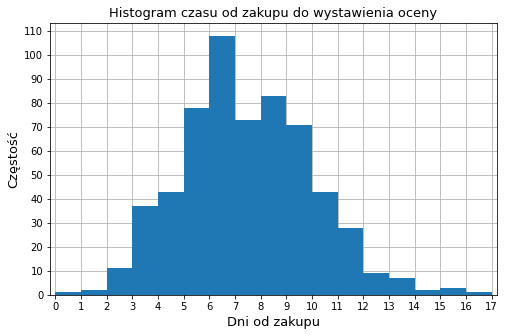

In [3]:
day_min = days_data.min()
day_max = days_data.max()
counts = Counter(days_data)
bins_ = np.arange(0, 18, 1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.grid(zorder=0)
plt.hist(days_data, bins=bins_, zorder=3)
plt.xlim([-0.2, 17.2])
plt.xticks(np.arange (0, 18, 1))
plt.yticks(np.arange(0, 120, 10))
plt.xlabel('Dni od zakupu', fontsize=13)
plt.ylabel('Częstość', fontsize=13)
plt.title('Histogram czasu od zakupu do wystawienia oceny', fontsize=13)
plt.show()

Na histogramie widać, że najwięcej kupujących wystawiło ocenę w 6 dniu od zakupu, natomiast najmniej w 0 oraz 16 dniu.

## Ilość zakupionych odkurzaczy danej marki
Zmienna 'Marka' zawiera ciągi znaków. Określa ona nazwy marek odkurzaczy, które zostały zakupione przez klientów sklepu. Istnieje 5 różnych marek, a na utworzonym wykresie każdy słupek będzie reprezentował jedną markę.

W związku z tym liczba przedziałów wyniesie 5.

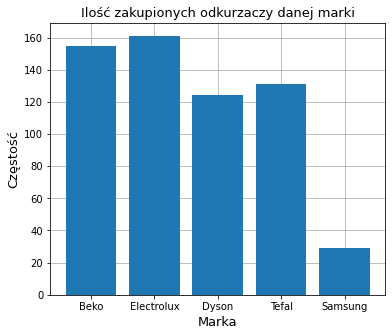

In [4]:
counts = Counter(name_data)
x_ax = [item for item in counts.keys()]
y_ax = [item for item in counts.values()]
plt.rcParams["figure.figsize"] = (6, 5)
plt.grid(zorder=0)
plt.bar(x_ax, y_ax, zorder=3)
plt.xlabel('Marka', fontsize=13)
plt.ylabel('Częstość', fontsize=13)
plt.title('Ilość zakupionych odkurzaczy danej marki', fontsize=13)
plt.show()

Na podstawie wykresu można stwierdzić, że klienci najczęściej wybierali odkurzacze marki Electrolux, a najrzadziej Samsung.

## Wiek kupującego
Zmienna 'Wiek kupującego' zawiera wartości zmiennoprzecinkowe. Określają one w jakim wieku była osoba dokonująca zakupu odkurzacza. Najmniejsza jej wartość wynosi 19, a największa 72, co oznacza, że jest 54 różne wartości wieku. Wszystkie wartości mają zerowe części dziesiętne. Tworząc histogram można przyjąć, że jeden słupek będzie odpowiadał za 5 wartości wieku.

W związku z tym liczba przedziałów wyniesie 11, natomiast szerokość przedziału wyniesie 5.

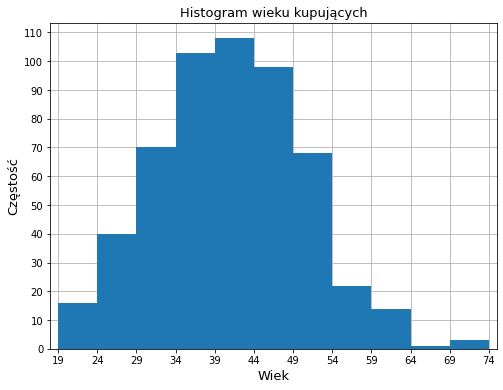

In [5]:
age_min = age_data.min()
age_max = age_data.max()
counts = Counter(age_data)
bins_ = np.arange(19, 75, 5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.grid(zorder=0)
plt.hist(age_data, bins=bins_, zorder=3)
plt.xlim([18, 75])
plt.xticks(np.arange(19, 75, 5))
plt.yticks(np.arange(0, 120, 10))
plt.xlabel('Wiek', fontsize=13)
plt.ylabel('Częstość', fontsize=13)
plt.title('Histogram wieku kupujących', fontsize=13)
plt.show()

Na histogramie widać, że najwięcej kupujących było w wieku od 39 do 44 lat, natomiast najmniej między 64 a 69 rokiem życia.

## Płeć kupującego
Zmienna 'Płeć kupującego' zawiera ciągi znaków. Określa ona płeć klientów, przez których zostały zakupione odkurzacze w sklepie. Przybiera ona 3 różne wartości, ze względu na brak danych dla niektórych zakupów. Utworzony wykres będzie zawierał jeden słupek dla każdej płci (zakupy z brakiem informacji o płci nie są brane pod uwagę).

W związku z tym liczba przedziałów wyniesie 2.

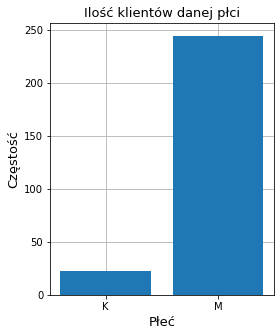

In [6]:
counts = Counter(gender_data)
x_ax = [item for item in counts.keys()]
y_ax = [item for item in counts.values()]
plt.rcParams["figure.figsize"] = (4, 5)
plt.grid(zorder=0)
plt.bar(x_ax, y_ax, zorder=3)
plt.xlabel('Płeć', fontsize=13)
plt.ylabel('Częstość', fontsize=13)
plt.title('Ilość klientów danej płci', fontsize=13)
plt.show()

Na podstawie wykresu można stwierdzić, że większość klientów stanowili mężczyźni.

## Ocena zakupu
Zmienna 'Ocena' zawiera wartości zmiennoprzecinkowe. Określa ona w jakim stopniu od 0 do 5 zakup spełnia oczekiwania klientów. Najmniejsza ocena wynosi 0.0, zwiększając się co 0.5, aż do największej wynoszącej 5.0. Tworząc histogram można przyjąć osobny słupek dla każdej możliwej oceny. 

W związku z tym liczba przedziałów wyniesie 11, natomiast szerokość przedziału wyniesie 0.5.

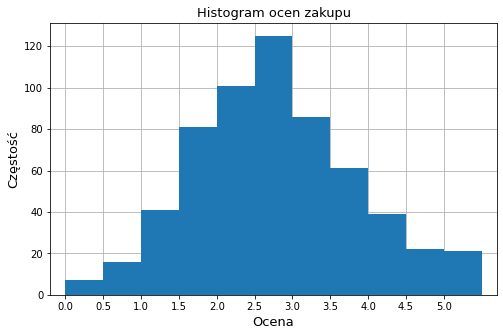

In [7]:
counts = Counter(rate_data)
bins_ = len(counts)
plt.rcParams["figure.figsize"] = (8, 5)
plt.grid(zorder=0)
plt.hist(rate_data, bins=np.linspace(start=0, stop=5.5, num=bins_+1), zorder=3)
plt.xlim([-0.2, 5.7])
plt.xticks(np.arange (0, 5.5, 0.5))
plt.xlabel('Ocena', fontsize=13)
plt.ylabel('Częstość', fontsize=13)
plt.title('Histogram ocen zakupu', fontsize=13)
plt.show()

Najwiecej klientów wystawiło ocenę 2.5, natomiast najmniej ocenę 0.